In [120]:
import numpy as np
from matplotlib import pyplot as plt

# Podatki

In [121]:
Fy = 1 # kN
Fx = 15 # kN
L = 250 # mm
# Jeklo: S235
h = 40 # mm
# C 140 x 60

In [122]:
t = 8 # mm (debeliba pločevine)
a = 5 # mm (debelina zvara)
r = 30 # mm (pasnica - rebro)
d1 = 90 # mm (pasnica)
d2 = 70 # mm (stojin)
d3 = 40 # mm (rebro)

# Dimenzije

In [123]:
y1 = d2 + t # mm (y - oddaljenost od središča)
y2 = y4 = a
y3 = y5 = d2 + t + r + a
y7 = y6 = a
y = [y1,y2,y3,y4,y5,y6,y7]
y

[78, 5, 113, 5, 113, 5, 5]

In [124]:
x1 = 2*a # mm (x - oddaljenost od središča)
x2 = 0
x4 = a + d1
x3 = a + d1/2 - t/2 - a
x5 = a + d1/2 + t/2
x6 = a+t
x7 = a+d1-t-a
x = [x1,x2,x3,x4,x5,x6,x7]
x

[10, 0, 41.0, 95, 54.0, 13, 82]

In [125]:
lzy1 = a # mm (y - dolžina zvara)
lzy2 = lzy4 = d2 + t - 2*a # mm (y - dolžina zvara)
lzy3 = lzy5 = d3 - 2*a # mm (y - dolžina zvara)
lzy6 = lzy7 = lzy2 - t
lzy = [lzy1,lzy2,lzy3,lzy4,lzy5,lzy6,lzy7]
lzy

[5, 68, 30, 68, 30, 60, 60]

In [126]:
lzx1 = d1 - 2*a # mm (x - dolžina zvara)
lzx2 = lzx4 = a # mm (x - dolžina zvara)
lzx3 = lzx5 = a # mm (x - dolžina zvara)
lzx6 = lzx7 = a
lzx = [lzx1,lzx2,lzx3,lzx4,lzx5,lzx6,lzx7]
lzx

[80, 5, 5, 5, 5, 5, 5]

In [127]:
A = [] # mm^2 (površina zvara)
for i in range(0,len(lzx)):
    j = lzx[i] * lzy[i]
    A.append(j)
A

[400, 340, 150, 340, 150, 300, 300]

# Težišča zvarov

In [128]:
yT = [] # mm (y - težišča)
for i in range(0,len(y)):
    j = lzy[i]/2 + y[i]
    yT.append(j)
yT

[80.5, 39.0, 128.0, 39.0, 128.0, 35.0, 35.0]

In [129]:
jj = 0
for i in range(0, len(A)):
    j = A[i] * yT[i]
    jj = jj + j
yTsys = jj / sum(A)
yTsys # mm (y - težišče sistema)

59.656565656565654

In [130]:
xTsys = a + d1/2
xTsys # mm (x - težišče sistema)

50.0

# Vztrajnostni moment

In [131]:
Iz = [] # mm^4 (težiščni vztrajnostni moment zvarov)
for i in range(0,len(lzy)):
    j = lzx[i] * lzy[i]**3 / 12
    Iz.append(j)
Iz

[833.3333333333334,
 131013.33333333333,
 11250.0,
 131013.33333333333,
 11250.0,
 90000.0,
 90000.0]

In [132]:
St = [] # mm^4 (Steinerjevo število zvarov)
for i in range(0,len(A)):
    j = A[i] * (yTsys - yT[i])**2
    St.append(j)
St

[173779.50209162335,
 145075.85960616262,
 700623.7526782984,
 145075.85960616262,
 700623.7526782984,
 182383.86899295988,
 182383.86899295988]

In [133]:
Izsys = sum(Iz) + sum(St) # mm^4 (težiščni vztrajnostni moment zvarov)
Izsys

2695306.464646465

# NTM

In [134]:
N = Fx*1000 # N (normalna sila - natezna)
N

15000

In [135]:
x = np.linspace(0,L,24)
# print(x)
x1 = np.linspace(L,0,24)
# print(x1)

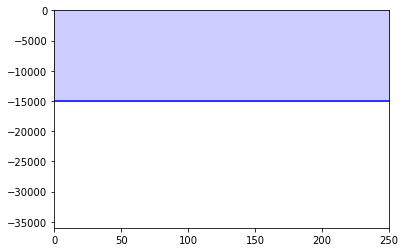

In [136]:
plt.plot(x,x*0-N,color = 'blue')
plt.axis((0, L, -N*2.4, 0))
plt.fill_between(x,-N,alpha=0.2,color = 'blue')

In [137]:
T = Fy*1000 # N (strižna sila)
T

1000

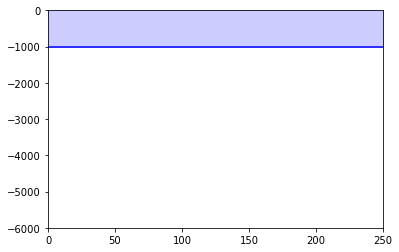

In [138]:
plt.plot(x,x*0-T,color = 'blue')
plt.axis((0, L, -T*6, 0))
plt.fill_between(x,-T,alpha=0.2,color = 'blue')

In [139]:
M = Fx * h + Fy * x1 # Nm (moment)
M

array([850.        , 839.13043478, 828.26086957, 817.39130435,
       806.52173913, 795.65217391, 784.7826087 , 773.91304348,
       763.04347826, 752.17391304, 741.30434783, 730.43478261,
       719.56521739, 708.69565217, 697.82608696, 686.95652174,
       676.08695652, 665.2173913 , 654.34782609, 643.47826087,
       632.60869565, 621.73913043, 610.86956522, 600.        ])

In [140]:
Mmax = max(M)*1000 # Nmm (max moment)
Mmax


850000.0

In [141]:
# %matplotlib notebook

In [142]:
# %matplotlib inline

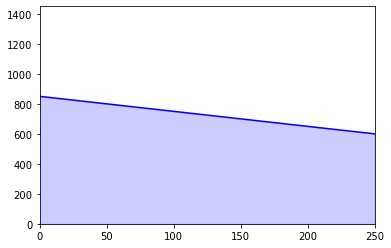

In [143]:
# plt.plot?
plt.plot(x,M,color = 'blue')
plt.axis((0, L, 0, Mmax/1000+600))
plt.fill_between(x,M,alpha=0.2,color = 'blue')

# Normalne napetosti v zvarih

In [144]:
yi = np.concatenate((np.linspace(a,d2+t-a,12), np.linspace(d2+t,d2+t+a,12),np.linspace(d2+t+r+a,d2+t+r+d3-a,12)))
yi

array([  5.        ,  11.18181818,  17.36363636,  23.54545455,
        29.72727273,  35.90909091,  42.09090909,  48.27272727,
        54.45454545,  60.63636364,  66.81818182,  73.        ,
        78.        ,  78.45454545,  78.90909091,  79.36363636,
        79.81818182,  80.27272727,  80.72727273,  81.18181818,
        81.63636364,  82.09090909,  82.54545455,  83.        ,
       113.        , 115.72727273, 118.45454545, 121.18181818,
       123.90909091, 126.63636364, 129.36363636, 132.09090909,
       134.81818182, 137.54545455, 140.27272727, 143.        ])

In [145]:
yTi = -yTsys + yi # mm (razdalja od težišča)
yTi

array([-54.65656566, -48.47474747, -42.29292929, -36.11111111,
       -29.92929293, -23.74747475, -17.56565657, -11.38383838,
        -5.2020202 ,   0.97979798,   7.16161616,  13.34343434,
        18.34343434,  18.7979798 ,  19.25252525,  19.70707071,
        20.16161616,  20.61616162,  21.07070707,  21.52525253,
        21.97979798,  22.43434343,  22.88888889,  23.34343434,
        53.34343434,  56.07070707,  58.7979798 ,  61.52525253,
        64.25252525,  66.97979798,  69.70707071,  72.43434343,
        75.16161616,  77.88888889,  80.61616162,  83.34343434])

In [146]:
Nap1 = N / sum(A) # N/mm^2 = MPa (normalna napetost)
Nap_nor = np.array([Nap1,Nap1,Nap1,Nap1,Nap1,Nap1,Nap1,Nap1,Nap1,Nap1,Nap1,Nap1])
Nap_nor

array([7.57575758, 7.57575758, 7.57575758, 7.57575758, 7.57575758,
       7.57575758, 7.57575758, 7.57575758, 7.57575758, 7.57575758,
       7.57575758, 7.57575758])

In [147]:
Nap_upo = Mmax / Izsys * yTi # N/mm^2 = MPa (upogibna napetost)
Nap_upo

array([-17.23665988, -15.287143  , -13.33762612, -11.38810924,
        -9.43859235,  -7.48907547,  -5.53955859,  -3.59004171,
        -1.64052483,   0.30899205,   2.25850894,   4.20802582,
         5.78484094,   5.92818777,   6.0715346 ,   6.21488143,
         6.35822826,   6.50157509,   6.64492192,   6.78826875,
         6.93161558,   7.07496241,   7.21830924,   7.36165607,
        16.82254682,  17.6826278 ,  18.54270877,  19.40278975,
        20.26287073,  21.1229517 ,  21.98303268,  22.84311366,
        23.70319464,  24.56327561,  25.42335659,  26.28343757])

In [148]:
Nap_sys = Nap_upo + max(Nap_nor) # N/mm^2 = MPa (skupna napetost)
Nap_sys

array([-9.66090231, -7.71138542, -5.76186854, -3.81235166, -1.86283478,
        0.0866821 ,  2.03619899,  3.98571587,  5.93523275,  7.88474963,
        9.83426651, 11.78378339, 13.36059852, 13.50394535, 13.64729218,
       13.79063901, 13.93398584, 14.07733267, 14.2206795 , 14.36402633,
       14.50737316, 14.65071999, 14.79406681, 14.93741364, 24.39830439,
       25.25838537, 26.11846635, 26.97854733, 27.8386283 , 28.69870928,
       29.55879026, 30.41887124, 31.27895221, 32.13903319, 32.99911417,
       33.85919514])

In [149]:
vline0 = np.array([0,0])
vline1 = np.array([yTi[0],yTi[0]])
vline2 = np.array([yTi[11],yTi[11]])
vline3 = np.array([yTi[12],yTi[12]])
vline4 = np.array([yTi[23],yTi[23]])
vline5 = np.array([yTi[24],yTi[24]])
vline6 = np.array([yTi[35],yTi[35]])

bb = np.array([min(min(Nap_nor),min(Nap_upo),min(Nap_sys))-2,max(max(Nap_nor),max(Nap_upo),max(Nap_sys))+2])

hline = np.array([yTi[0],yTi[35]])

bbb = np.array([0,0])

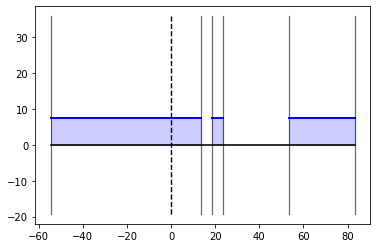

In [150]:
#Nateg
plt.plot(yTi[0:12], Nap_nor[0:12],color = 'blue',linewidth = 2)
plt.fill_between(yTi[0:12],Nap_nor[0:12],alpha=0.2,color = 'blue')
plt.plot(yTi[12:24], Nap_nor[0:12],color = 'blue',linewidth = 2)
plt.fill_between(yTi[12:24],Nap_nor[0:12],alpha=0.2,color = 'blue')
plt.plot(yTi[24:36], Nap_nor[0:12],color = 'blue',linewidth = 2)
plt.fill_between(yTi[24:36],Nap_nor[0:12],alpha=0.2,color = 'blue')

# Grid:

plt.plot(vline0,bb,'--k',linewidth = 1.4)
plt.plot(vline1,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline2,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline3,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline4,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline5,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline6,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(hline,bbb,'k',linewidth = 1.6)


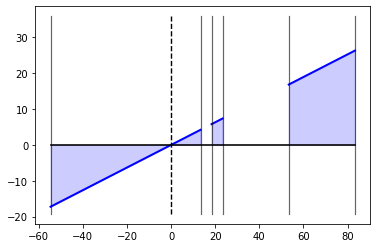

In [151]:
#Upogib 
plt.plot(yTi[0:12], Nap_upo[0:12],color = 'blue',linewidth = 2)
plt.fill_between(yTi[0:12],Nap_upo[0:12],alpha=0.2,color = 'blue')
plt.plot(yTi[12:24], Nap_upo[12:24],color = 'blue',linewidth = 2)
plt.fill_between(yTi[12:24],Nap_upo[12:24],alpha=0.2,color = 'blue')
plt.plot(yTi[24:36], Nap_upo[24:36],color = 'blue',linewidth = 2)
plt.fill_between(yTi[24:36],Nap_upo[24:36],alpha=0.2,color = 'blue')

# Grid:

plt.plot(vline0,bb,'--k',linewidth = 1.4)
plt.plot(vline1,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline2,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline3,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline4,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline5,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline6,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(hline,bbb,'k',linewidth = 1.6)

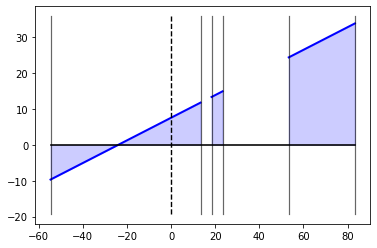

In [152]:
#Graf nateznih in strižnih 
plt.plot(yTi[0:12], Nap_sys[0:12],color = 'blue',linewidth = 2)
plt.fill_between(yTi[0:12],Nap_sys[0:12],alpha=0.2,color = 'blue')
plt.plot(yTi[12:24], Nap_sys[12:24],color = 'blue',linewidth = 2)
plt.fill_between(yTi[12:24],Nap_sys[12:24],alpha=0.2,color = 'blue')
plt.plot(yTi[24:36], Nap_sys[24:36],color = 'blue',linewidth = 2)
plt.fill_between(yTi[24:36],Nap_sys[24:36],alpha=0.2,color = 'blue')

# Grid:

plt.plot(vline0,bb,'--k',linewidth = 1.4)
plt.plot(vline1,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline2,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline3,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline4,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline5,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline6,bb,'k',alpha=0.6,linewidth = 1.2)
plt.plot(hline,bbb,'k',linewidth = 1.6)

# Strižne napetosti v zvarih

In [153]:
Nap2 = T/sum(A[1:len(A)]) # N/mm^2 = MPa (strižna napetost)
Nap_str = np.array([Nap2,Nap2,Nap2,Nap2,Nap2,Nap2,Nap2,Nap2,Nap2,Nap2,Nap2,Nap2])
Nap_str

array([0.63291139, 0.63291139, 0.63291139, 0.63291139, 0.63291139,
       0.63291139, 0.63291139, 0.63291139, 0.63291139, 0.63291139,
       0.63291139, 0.63291139])

In [154]:
bb1 = np.array([min(Nap_str)-6,max(Nap_str)+6])
bb1

array([-5.36708861,  6.63291139])

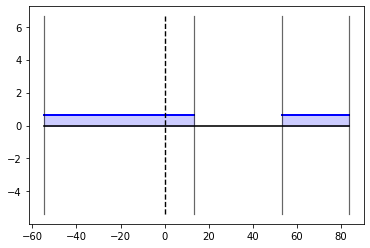

In [155]:
#Strižne obremenitve 
plt.plot(yTi[0:12], Nap_str[0:12],color = 'blue',linewidth = 2)
plt.fill_between(yTi[0:12],Nap_str[0:12],alpha=0.2,color = 'blue')
plt.plot(yTi[24:36], Nap_str[0:12],color = 'blue',linewidth = 2)
plt.fill_between(yTi[24:36],Nap_str[0:12],alpha=0.2,color = 'blue')

# Grid:

plt.plot(vline0,bb1,'--k',linewidth = 1.4)
plt.plot(vline1,bb1,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline2,bb1,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline5,bb1,'k',alpha=0.6,linewidth = 1.2)
plt.plot(vline6,bb1,'k',alpha=0.6,linewidth = 1.2)
plt.plot(hline,bbb,'k',linewidth = 1.6)

# Kontrole

In [156]:
σ_E2 = max(Nap_sys)
τ_E2 = Nap2
print(σ_E2)
print(τ_E2)

33.85919514440946
0.6329113924050633


In [157]:
#Določitev trdnosti utrujanja
m_normalni = 3
m_strižni = 5
Δσ_C = 36 
Δτ_C = 80
# N_r = 10**6
N_r = 8*10**5


Δσ_r = (Δσ_C**m_normalni*2*10**6/N_r)**(1/m_normalni)
print(Δσ_r)

Δτ_r = (Δτ_C**m_strižni*2*10**6/N_r)**(1/m_strižni)
print(Δτ_r)

48.85951709870831
96.08995471851452


In [158]:
#kontrola
γ_mf = 1.25
γ_Ff = 1
m_normalni = 3
m_strižni = 5


σ_komb = (σ_E2*γ_Ff/(Δσ_r /γ_mf))
print(σ_komb)
(σ_E2*γ_Ff/(Δσ_r /γ_mf)) <= 1




0.8662384821570563


True

In [159]:
τ_komb = (τ_E2*γ_Ff/(Δτ_r/γ_mf))
print(τ_komb)
(τ_E2*γ_Ff/(Δτ_r/γ_mf)) <= 1


0.008233318902312827


True

In [160]:
σ_skupna = σ_komb**m_normalni + τ_komb**m_strižni
print(σ_skupna)
σ_komb**m_normalni + τ_komb**m_strižni  <= 1

0.6499985971831033


True

In [161]:
f_y= 355 #material 
print(1.5*f_y)
σ_E2 <= 1.5*f_y

532.5


True

# Površinska napetost

In [162]:
#podatki
F_1 = Fy = 1.2 # kN
F_2 = Fx = 30 # kN
L = 300 # mm

#h = 40 # mm
L_1 = 120 # mm
#Jeklo: S335
dL = 26 # mm
t_s = 10 # mm

h = d2+t+h-40 #TOLE JE NOVO!!!

In [163]:
Fbx = (-F_1*L+30 - F_2 *h)/L_1 
Fax = -Fbx -F_2
Fay = Fy
print(Fbx)
print(Fax)
list_1 = [Fbx,Fax]


-22.25
-7.75


In [164]:
f_y = 355 #jeklo : 355 
f_max_p = max(list_1)
f_max_p = abs(f_max_p)
faktor_varnosti = 1.5
σ_dop = f_y/faktor_varnosti
p_dop = 0.75*σ_dop
print(p_dop)
print(f_max_p/t_s*dL)
(f_max_p/t_s*dL) <= p_dop

177.5
20.150000000000002


True

# Težišče telesa

In [165]:
#podatki, TA IZRAČUN VELJA ZA ENO REBRO!!

t = 10 # mm (debeliba pločevine)
a = 7 # mm (debelina zvara)
r = 30 # mm (pasnica - rebro)
d1 = 110 # mm (pasnica)
d2 = 75# mm (stojin)
d3 = 50 # mm (rebro)
h = 30

In [166]:
y1 = y2 = d2/2
y3 = d2 + t/2
y4 = d2 + t + h + d3/2

y_list = [y1,y2,y3,y4]

z1 =  d1 -t/2
z2 =  (d1 -t/2)*(-1)
z3 = 0
z4 = 0

z_list = [z1,z2,z3,z4]

A1 = A2 = d2*t # površina stojine
A3 = d1*t # površina pasnica
A4 = d3*t # površina rebra

A_list = [A1,A2,A3,A4]
print(y_list)
print(z_list)
print(A_list)

[37.5, 37.5, 80.0, 140.0]
[105.0, -105.0, 0, 0]
[750, 750, 1100, 500]


In [167]:
#težišče
yt = (A1*y1+A2*y2+A3*y3+A4*y4)/(A1+A2+A3+A4)
print(yt)
zt = (A1*z1+A2*z2+A3*z3+A4*z4)/(A1+A2+A3)
print(zt)

69.11290322580645
0.0


In [168]:
#vztrajnostni moment

Iz1 = t*d2**3/12
Iz2 = Iz1
Iz3 = d1*t**3/12
Iz4 = t*d3**3/12

Iz_list = [Iz1,Iz2 ,Iz3 ,Iz4 ]
print(Iz_list)
Iy1 = d2*t**3/12
Iy2 = Iy1
Iy3 = d1**3*t/12
Iy4 = d3*t**3/12   

Iy_list = [Iy1,Iy2,Iy3 ,Iy4]
print(Iy_list)

[351562.5, 351562.5, 9166.666666666666, 104166.66666666667]
[6250.0, 6250.0, 1109166.6666666667, 4166.666666666667]


In [169]:
# odbportnostni moment

Wz1 = t*d2**2/6
Wz2 = Wz1
Wz3 = d1*t**2/6
Wz4 = t*d3**2/6

Wz_list = [Wz1,Wz2 ,Wz3 ,Wz4 ]
print(Wz_list)

Wy1 = d2*t**2/6
Wy2 = Wy1
Wy3 = d1**2*t/6
Wy4 = d3*t**2/6 

Wy_list = [Wy1,Wy2,Wy3 ,Wy4]
print(Wy_list)

[9375.0, 9375.0, 1833.3333333333333, 4166.666666666667]
[1250.0, 1250.0, 20166.666666666668, 833.3333333333334]


# Vztrajnostni moment

In [170]:
iz_s=[]
for i in range(0,4):
    Iz1 = Iz_list[i] + (y_list[i] - yt)**2*A_list[i]
    iz_s.append(Iz1)
    
Iz=sum(iz_s)
Iz

4958393.817204301

In [171]:
iys = []
for i in range(0,4):
    iy_s = Iy_list[i] + (z_list[i] - zt)**2*A_list[i]
    iys.append(iy_s)
    
Iy = sum(iys)
Iy

17663333.333333336

# Odpornostni moment

In [172]:
wz_s=[]
tvoja_oci = []
for i in range(0,4):
    wz1 = Wz_list[i] + (y_list[i] - yt)**2*A_list[i]
    wz_s.append(wz1)
    
Wz=sum(wz_s)
Wz

4166685.4838709678

In [173]:
wys = []
for i in range(0,4):
    Wy_s = Wy_list[i] + (z_list[i] - zt)**2*A_list[i]
    wys.append(Wy_s)
    
Wy = sum(wys)
Wy

16561000.0

# 2.1 Določitev dimenzij profila


In [176]:
σ_fdop = 355

σ_max = /Wz
σ_max <=  σ_fdop
σ_max

0.20399907871383807

In [175]:
Fy = 1
E = 2.1*10**5

f_dop = L/500
L = 240
f_max = (Fy*10*3*L**3)/(3*E*Iz)
print(f_max)
(Fy*10*3*L**3)/(3*E*Iz) <= f_dop

0.00013276188591588645


True